In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a=np.eye(5)
a

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

single variable linear regression

In [3]:
path="E:/andrew machine learning/andrew_ml_ex14179/ex1data1.txt"
data1=pd.read_csv(path,header=None,names=["Population","Profit"])
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


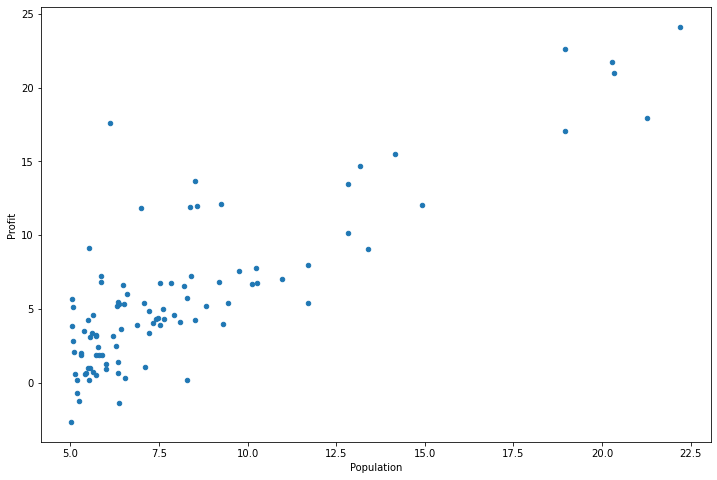

In [4]:
data1.plot(kind="scatter",x="Population",y="Profit",figsize=(12,8))
plt.show()

In [5]:
def cost_function(X,y,theta):
    inner=np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [13]:
cost_function(X,y,theta)

32.072733877455676

In [7]:
data1.insert(0,"Ones",1)

In [8]:
cols=data1.shape[1]
X=data1.iloc[:,:-1]
y=data1.iloc[:,cols-1:cols]

In [9]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [11]:
X=np.matrix(X.values)
y=np.matrix(y.values)
theta=np.matrix(np.array([0,0]))

In [12]:
print(X.shape,y.shape,theta.shape)

(97, 2) (97, 1) (1, 2)


In [59]:
def gredient_descent(X,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.ravel().shape[1])
    cost=np.zeros(iters)
    
    for i in range(iters):
        error=(X*theta.T)-y
        
        for j in range(parameters):
            term=np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term))
    
        theta=temp
        cost[i]=cost_function(X,y,theta)
    
    return theta,cost

In [60]:
alpha=0.01
iters=1000

In [61]:
g,cost=gredient_descent(X,y,theta,alpha,iters)
theta1

matrix([[0.05839135, 0.6532885 ]])

In [62]:
predict1=[1,7]*g.T
print("predict1",predict1)

predict1 [[4.64965727]]


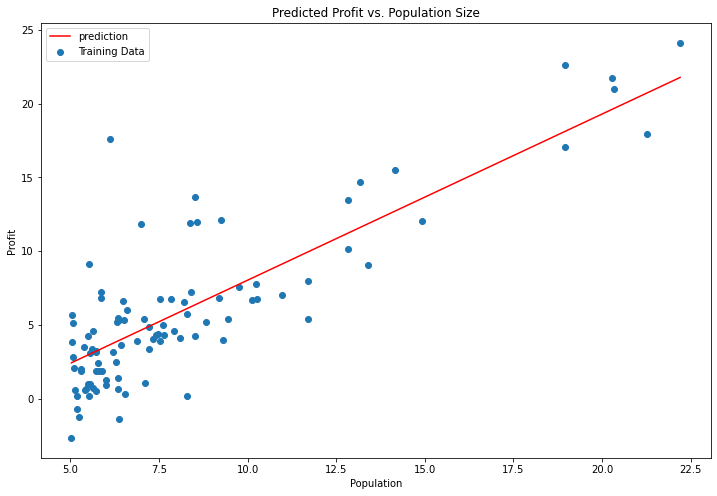

In [63]:
x=np.linspace(data1["Population"].min(),data1["Population"].max(),100)
f=g[0,0]+(g[0,1]*x)

fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,"r",label="prediction")
ax.scatter(data1["Population"],data1["Profit"],label="Training Data")
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

multiple linear regressions

In [18]:
path2="E:/andrew machine learning/andrew_ml_ex14179/ex1data2.txt"
data2=pd.read_csv(path2,header=None,names=["Size","Bedrooms","Price"])

In [19]:
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [20]:
data2=(data2-data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [21]:
#gredient descent
data2.insert(0,"Ones",1)

In [31]:
cols=data2.shape[1]
X2=data2.iloc[:,:cols-1]
y2=data2.iloc[:,cols-1:cols]

In [32]:
X2=np.matrix(X2.values)
y2=np.matrix(y2.values)
theta=np.matrix(np.array([0,0,0]))

In [33]:
g2,cost2=gredient_descent(X2,y2,theta,alpha,iters)

In [34]:
g2

matrix([[-9.68492426e-19,  8.36796367e-03,  4.32851306e-03]])

In [44]:
#normal equations
def normal_equations(X,y):
    X_T_X_inv=np.linalg.inv((X.T)*X)
    theta=X_T_X_inv*X.T*y
    return theta

In [46]:
g1=normal_equations(X,y)

In [52]:
g1

matrix([[-3.89578088],
        [ 1.19303364]])

In [51]:
[1,7]*g1

matrix([[4.45545463]])